# COGS 209: Youth Mental Health

In [1]:
# Import libraries
import pandas as pd
import requests
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
# Read in files
df = pd.read_csv('data/YRBS_2023.csv')
df.head()

/var/folders/lp/wvqcc0x13jjb99jsy0mqncqr0000gn/T/ipykernel_77160/4240641621.py:2: DtypeWarning: Columns (248) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/YRBS_2023.csv')


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,QNILLICT,QNOBESE,QNOWT,WEIGHT,STRATUM,PSU,BMIPCT,RACEETH,Q6ORIG,Q7ORIG
0,3.0,1.0,1.0,NaN,C,1.65 81.6544111131112212212212211211121111,81.6544111131112212212212211211121111111111111...,4.0,4.0,1.0,...,NaN,1.0,2.0,0.8614103 1629497.08 505180,103,16294,97.08 505180,NaN,505,180
1,4.0,2.0,1.0,2.0,E,51111111222212231222211211121111,5111111122221223122221121112111111111111111111...,5.0,1.0,1.0,...,2.0,NaN,NaN,0.8920103 16294 . 5N N233,103,16294,. 5N N233,5.0,N N,233
2,5.0,2.0,3.0,2.0,E,1.68 74.8453231111112212212212211151112211,74.8453231111112212212212211151112211361111111...,5.0,3.0,2.0,...,1.0,2.0,1.0,0.5081103 1629492.26 5506165,103,16294,92.26 5506165,5.0,506,165
3,6.0,1.0,2.0,2.0,E,41281131112112212212211211117811,4128113111211221221221121111781135212845211211...,4.0,1.0,2.0,...,1.0,NaN,NaN,1.1759103 16294 . 5N N105,103,16294,. 5N N105,5.0,N N,105
4,3.0,2.0,1.0,2.0,E,1.85 56.7051111111312212112212111151111131,56.7051111111312212112212111151111131352122111...,5.0,1.0,1.0,...,2.0,2.0,2.0,0.8920103 16294 7.57 5601125,103,16294,7.57 5601125,5.0,601,125


## Data Cleaning
Not much data cleaning is needed for this data, other than to remove irrelevant columns!

In [3]:
df_cleaned = df.filter(items = ['Q84', 'Q26', 'Q27', 'Q28', 'Q29', 'Q80', 'Q76', 'Q25', 'Q2','Q1', 'Q86', 'RACEETH'])
df_cleaned.head()

,Q84,Q26,Q27,Q28,Q29,Q80,Q76,Q25,Q2,Q1,Q86,RACEETH
0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,3.0,1.0,NaN
1,3.0,2.0,2.0,2.0,1.0,4.0,5.0,2.0,2.0,4.0,1.0,5.0
2,2.0,1.0,2.0,2.0,1.0,8.0,8.0,2.0,2.0,5.0,1.0,5.0
3,3.0,1.0,2.0,2.0,1.0,8.0,3.0,2.0,1.0,6.0,1.0,5.0
4,3.0,1.0,2.0,1.0,1.0,6.0,8.0,2.0,2.0,3.0,1.0,5.0


## Exploratory Data Analysis (EDA)

In [4]:
# Shape of dataset
df_cleaned.shape

(20103, 12)

In [5]:
# Counting null values in each columns
df_cleaned.isnull().sum()

Q84        4398
Q26         240
Q27         436
Q28        1737
Q29         767
Q80        4900
Q76        1227
Q25         205
Q2          158
Q1           98
Q86        5562
RACEETH     370
dtype: int64

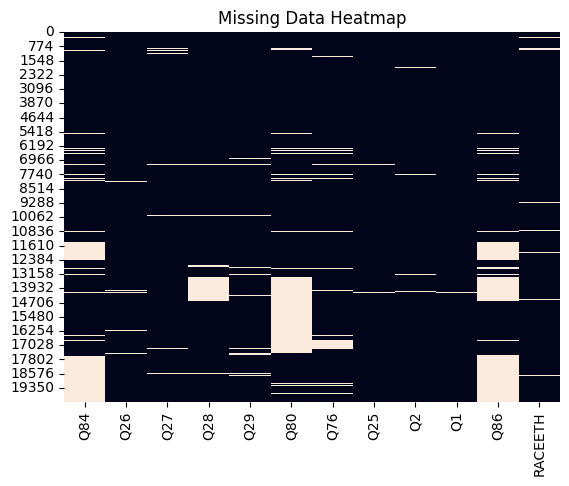

In [6]:
# Visualizing missing data
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
# Summary statistics for dataframe
df_cleaned.describe()

,Q84,Q26,Q27,Q28,Q29,Q80,Q76,Q25,Q2,Q1,Q86,RACEETH
count,15705.000000,19863.000000,19667.000000,18366.000000,19336.000000,15203.000000,18876.000000,19898.000000,19945.000000,20005.000000,14541.000000,19733.000000
mean,2.825215,1.591804,1.785732,1.825112,1.170304,6.048675,4.978332,1.827973,1.504437,4.892677,1.146001,5.010845
std,1.217580,0.491512,0.410324,0.379882,0.578209,1.981993,2.503022,0.377414,0.499993,1.218455,0.803579,1.832258
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,2.000000,1.000000,6.000000,3.000000,2.000000,1.000000,4.000000,1.000000,5.000000
50%,3.000000,2.000000,2.000000,2.000000,1.000000,6.000000,5.000000,2.000000,2.000000,5.000000,1.000000,5.000000
75%,4.000000,2.000000,2.000000,2.000000,1.000000,8.000000,8.000000,2.000000,2.000000,6.000000,1.000000,6.000000
max,5.000000,2.000000,2.000000,2.000000,5.000000,8.000000,8.000000,2.000000,2.000000,7.000000,7.000000,8.000000


### Demographic Info

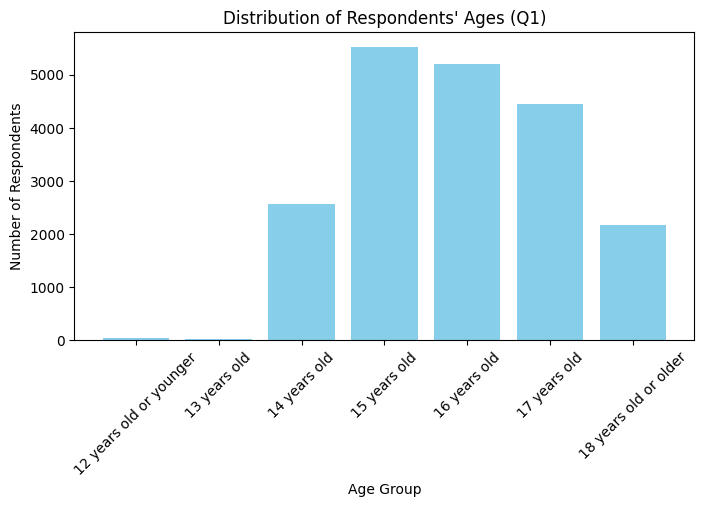

In [8]:
# Creating key for age groups
age_counts = df_cleaned['Q1'].value_counts().sort_index()

age_key = {
    1.0: '12 years old or younger',
    2.0: '13 years old',
    3.0: '14 years old',
    4.0: '15 years old',
    5.0: '16 years old',
    6.0: '17 years old',
    7.0: '18 years old or older'
}

age_counts.index = age_counts.index.map(age_key)

# Display distribution of ages
plt.figure(figsize=(8,4))
ages = plt.bar(age_counts.index, age_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Ages (Q1)")
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

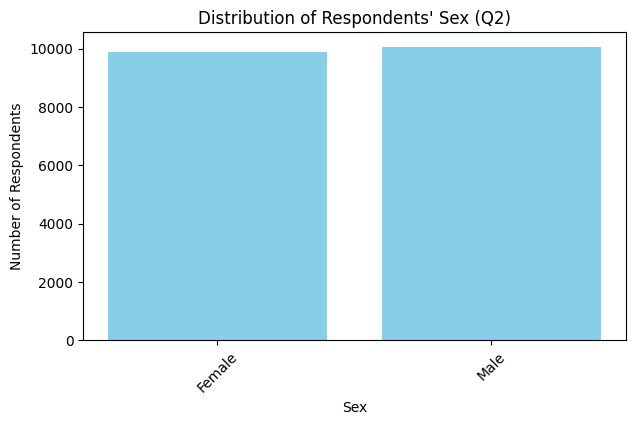

In [9]:
# Creating key for sex
sex_counts = df_cleaned['Q2'].value_counts().sort_index()

sex_key = {
    1.0: 'Female',
    2.0: 'Male'
}

sex_counts.index = sex_counts.index.map(sex_key)

# Display distribution of sex
plt.figure(figsize=(7,4))
ages = plt.bar(sex_counts.index, sex_counts, color = 'skyblue')
plt.title("Distribution of Respondents' Sex (Q2)")
plt.xlabel('Sex')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

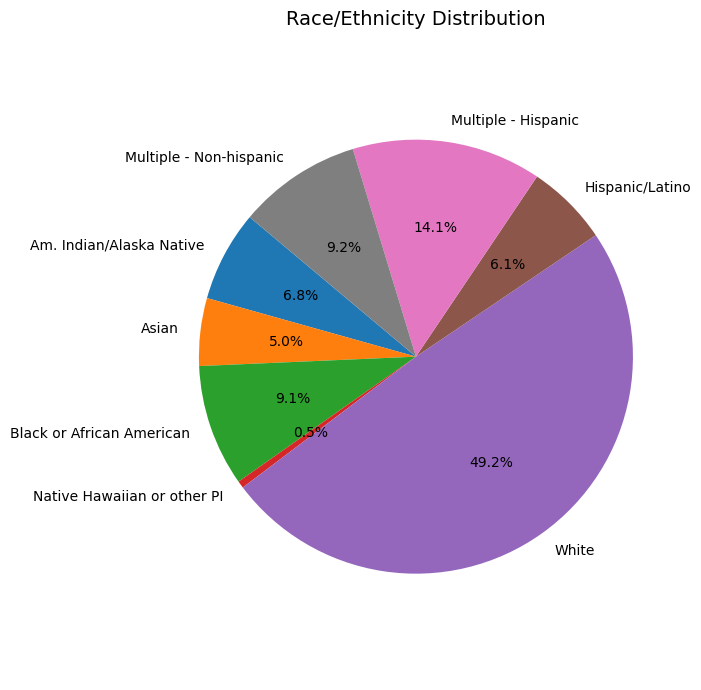

In [10]:
# Looking at race
race_counts = df_cleaned['RACEETH'].value_counts().sort_index()

race_key = {
    1.0: 'Am. Indian/Alaska Native',
    2.0: 'Asian',
    3.0: 'Black or African American',
    4.0: 'Native Hawaiian or other PI',
    5.0: 'White',
    6.0: 'Hispanic/Latino',
    7.0: 'Multiple - Hispanic',
    8.0: 'Multiple - Non-hispanic'
}

race_counts.index = race_counts.index.map(race_key)

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    race_counts.values,
    labels=race_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
plt.title("Race/Ethnicity Distribution", fontsize=14)
plt.axis('equal')  # Ensures the pie is a circle
plt.tight_layout()
plt.show()

### Factors of Interest

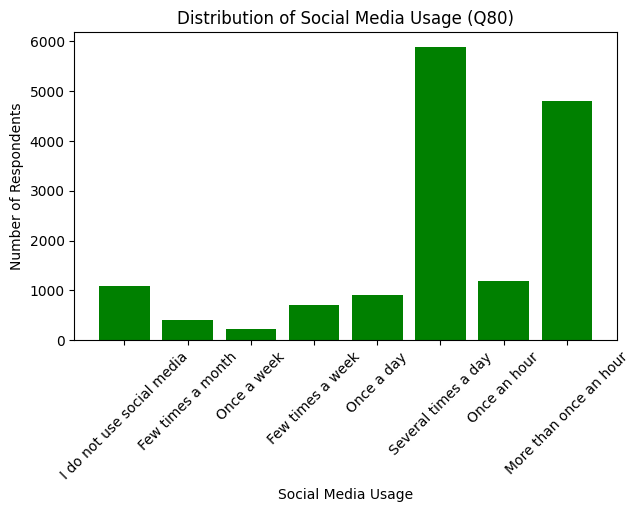

In [11]:
# Creating key for social media usage
sm_counts = df_cleaned['Q80'].value_counts().sort_index()

sm_key = {
    1.0: 'I do not use social media',
    2.0: 'Few times a month',
    3.0: 'Once a week',
    4.0: 'Few times a week',
    5.0: 'Once a day',
    6.0: 'Several times a day',
    7.0: 'Once an hour',
    8.0: 'More than once an hour'
}

sm_counts.index = sm_counts.index.map(sm_key)

# Display distribution of social media usage
plt.figure(figsize=(7,4))
ages = plt.bar(sm_counts.index, sm_counts, color = 'green')
plt.title("Distribution of Social Media Usage (Q80)")
plt.xlabel('Social Media Usage')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Frequency of being electronically bullied over the past 12 months
bullied_counts = df_cleaned['Q25'].value_counts().sort_index()

bullied_key = {
    1.0: 'Yes',
    2.0: 'No'
}

bullied_counts.index = bullied_counts.index.map(bullied_key)
bullied_counts

Q25
Yes     3423
No     16475
Name: count, dtype: int64

In [13]:
# Frequency of being electronically bullied over the past 12 months
bullied_counts = df_cleaned['Q26'].value_counts().sort_index()

bullied_key = {
    1.0: 'Yes',
    2.0: 'No'
}

bullied_counts.index = bullied_counts.index.map(bullied_key)
bullied_counts

Q26
Yes     8108
No     11755
Name: count, dtype: int64

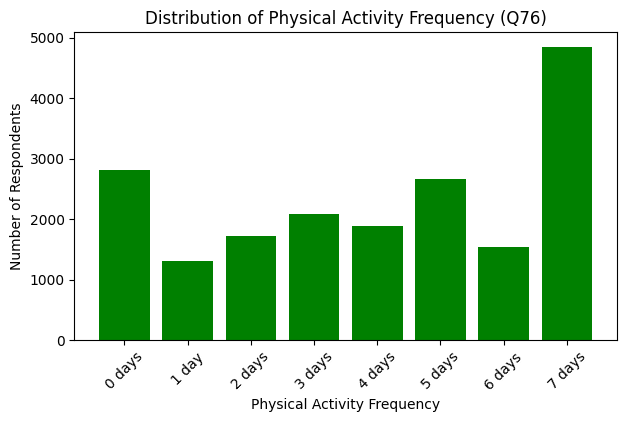

In [14]:
# Frequency of days in a week where respondent was physically active for >60 minutes that day
# Creating key for phys. activity
pa_counts = df_cleaned['Q76'].value_counts().sort_index()

pa_key = {
    1.0: '0 days',
    2.0: '1 day',
    3.0: '2 days',
    4.0: '3 days',
    5.0: '4 days',
    6.0: '5 days',
    7.0: '6 days',
    8.0: '7 days'
}

pa_counts.index = pa_counts.index.map(pa_key)

# Display distribution of phys. activity
plt.figure(figsize=(7,4))
ages = plt.bar(pa_counts.index, pa_counts, color = 'green')
plt.title("Distribution of Physical Activity Frequency (Q76)")
plt.xlabel('Physical Activity Frequency')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

### Measures of Mental Health

In [15]:
# Q84: During the last 30 days, how often was your mental health not good?
df_cleaned['Q84'].mean()

2.825214899713467

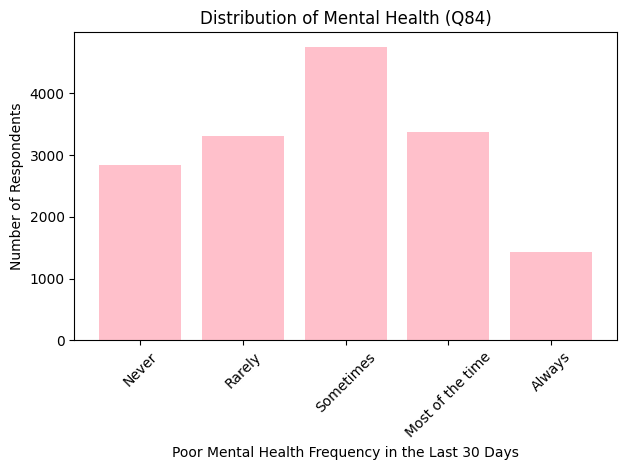

In [16]:
# Distribution of Q84
# Creating key for mental health
mh_counts = df['Q84'].value_counts().sort_index()

mh_key = {
    1.0: 'Never',
    2.0: 'Rarely',
    3.0: 'Sometimes',
    4.0: 'Most of the time',
    5.0: 'Always'
}

mh_counts.index = mh_counts.index.map(mh_key)

# Display distribution of mental health
plt.figure(figsize=(7,4))
ages = plt.bar(mh_counts.index, mh_counts, color = 'pink')
plt.title("Distribution of Mental Health (Q84)")
plt.xlabel('Poor Mental Health Frequency in the Last 30 Days')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

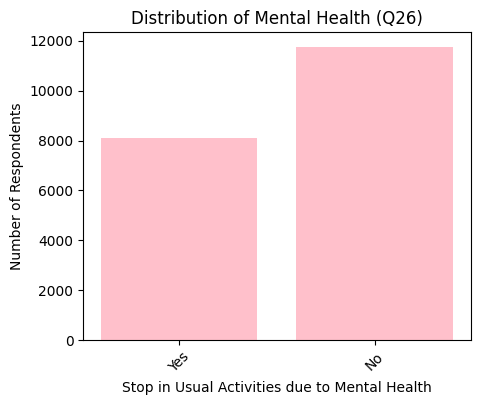

In [17]:
# Q26: During the past 12 months, did you ever feel sad or hopeless almost everyday for two weeks or more in a row...
#... that you stopped doing some usual activities?

# Distribution of Q26
# Creating key for hopeless feelings/stop activities
mh2_counts = df['Q26'].value_counts().sort_index()

mh2_key = {
    1.0: 'Yes',
    2.0: 'No'
}

mh2_counts.index = mh2_counts.index.map(mh2_key)

# Display distribution of hopeless feelings/stop activities
plt.figure(figsize=(5,4))
ages = plt.bar(mh2_counts.index, mh2_counts, color = 'pink')
plt.title("Distribution of Mental Health (Q26)")
plt.xlabel('Stop in Usual Activities due to Mental Health')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

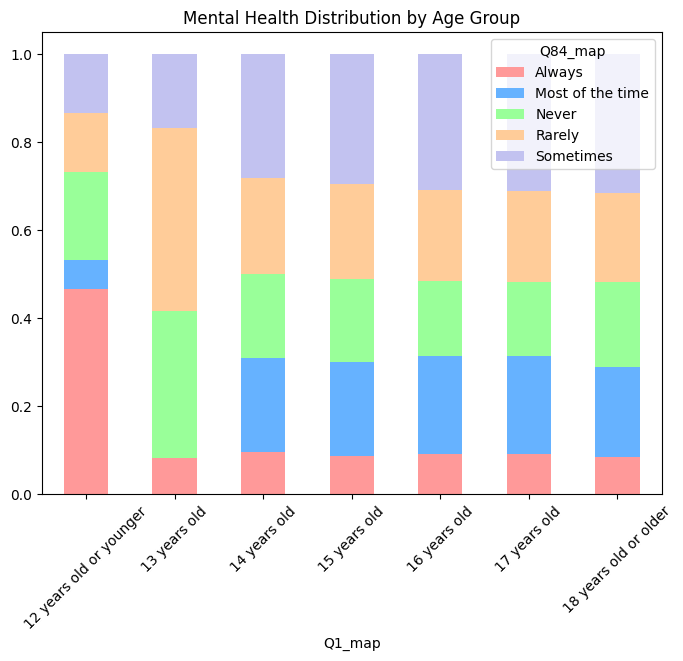

In [18]:
# Looking at mental health distribution by age group
df_cleaned['Q1_map'] = df_cleaned['Q1'].map(age_key)
df_cleaned['Q84_map'] = df_cleaned['Q84'].map(mh_key)

df_cleaned.groupby('Q1_map')['Q84_map'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(8, 6), color = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FFB3E6', '#FF6666'])
plt.title('Mental Health Distribution by Age Group')
plt.xticks(rotation=45)
plt.show()

In [19]:
# renaming columns
rename_dict = {'Q84': '30_day_mental_health',
          'Q26': 'sad_hopeless',
          'Q27': 'suicide_ideation',
          'Q28': 'suicide_planning',
          'Q29': 'suicide_attempt',
          'Q80': 'social_media',
          'Q25': 'cyberbully',
          'Q76': 'physical_activity',
          'Q86': 'sleep_loc',
          'Q2': 'sex',
          'Q1': 'age',
          'RACEETH': 'raceeth',
          'Q1_map': 'age_map',
          'Q84_map': '30_day_mental_health_map' }
df_cleaned = df_cleaned.rename(mapper = rename_dict, axis = 1)

In [55]:
df_cleaned = df_cleaned.dropna()

def to_0_1(number):
    if number == 1.0:
        return 1
    elif number == 2.0:
        return 0
    else: 
        return number
    
def reduce_by_one(number):
    return number - 1

df_cleaned['sad_hopeless'] = df_cleaned['sad_hopeless'].apply(to_0_1)
df_cleaned['cyberbully'] = df_cleaned['cyberbully'].apply(to_0_1)
df_cleaned['physical_activity'] = df_cleaned['physical_activity'].apply(reduce_by_one)

df_cleaned.describe()

,30_day_mental_health,sad_hopeless,suicide_ideation,suicide_planning,suicide_attempt,social_media,physical_activity,cyberbully,sex,age,sleep_loc,raceeth
count,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000,10675.000000
mean,2.840843,0.433724,1.774333,1.815457,1.171054,6.143794,3.011241,0.174052,1.506417,5.037752,1.142108,5.018361
std,1.197735,0.495611,0.418041,0.387945,0.568162,1.875961,2.498541,0.379172,0.499982,1.209844,0.821155,1.962655
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,0.000000,2.000000,2.000000,1.000000,6.000000,1.000000,0.000000,1.000000,4.000000,1.000000,5.000000
50%,3.000000,0.000000,2.000000,2.000000,1.000000,6.000000,3.000000,0.000000,2.000000,5.000000,1.000000,5.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,8.000000,6.000000,0.000000,2.000000,6.000000,1.000000,7.000000
max,5.000000,1.000000,2.000000,2.000000,5.000000,8.000000,6.000000,1.000000,2.000000,7.000000,7.000000,8.000000


In [21]:
df_cleaned.social_media.astype('category')
df_cleaned.age.astype('category')
df_cleaned.sex.astype('category')

1        2.0
2        2.0
3        1.0
4        2.0
6        2.0
        ... 
17519    1.0
17524    2.0
17543    1.0
17546    2.0
17547    1.0
Name: sex, Length: 10675, dtype: category
Categories (2, float64): [1.0, 2.0]

In [22]:
# predicting Q26 - persistent feelings of sadness or hopelessness - using social_media, physical_activity, cyberbully

feature_cols = ['social_media', 'physical_activity', 'cyberbully']
X = df_cleaned[feature_cols] # Features
y = df_cleaned.sad_hopeless # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1231)

logreg = LogisticRegression(random_state=1231)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1597,  191],
       [ 933,  482]])

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_cleaned[['social_media', 'physical_activity', 'cyberbully']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature       VIF
0       social_media  3.211511
1  physical_activity  2.988583
2         cyberbully  1.218572


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_cleaned[['social_media', 'physical_activity', 'cyberbully', 'age', 'sex']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

             feature        VIF
0       social_media   8.609660
1  physical_activity   3.665468
2         cyberbully   1.227282
3                age  11.171914
4                sex   8.488360


In [25]:
feature_cols = ['social_media', 'physical_activity', 'cyberbully', 'age', 'sex']
X_dem = df_cleaned[feature_cols] # Features
y_dem = df_cleaned.sad_hopeless # Target variable

X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(X_dem, y_dem, test_size=0.30, random_state=1231)

logreg_dem = LogisticRegression(random_state=1231)

# fit the model with data
logreg_dem.fit(X_train_dem, y_train_dem)



y_pred_dem = logreg_dem.predict(X_test_dem)

cnf_matrix = metrics.confusion_matrix(y_test_dem, y_pred_dem)
cnf_matrix

array([[1421,  367],
       [ 678,  737]])

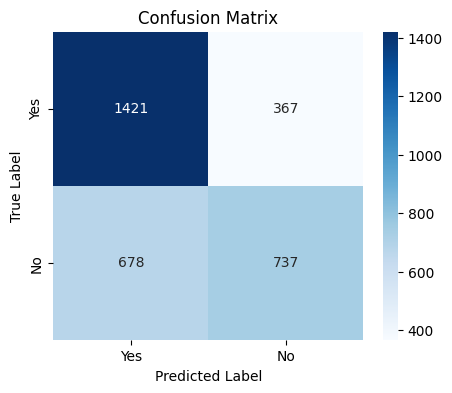

In [26]:
plt.figure(figsize=(5,4))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define features and target variable
feature_cols = ['social_media', 'physical_activity', 'cyberbully', 'age', 'sex']
X_dem = df_cleaned[feature_cols]  # Features
y_dem = df_cleaned.sad_hopeless  # Target variable

# Add a constant (intercept) to the features
X_dem = sm.add_constant(X_dem)

# Split the data
X_train_dem, X_test_dem, y_train_dem, y_test_dem = train_test_split(X_dem, y_dem, test_size=0.30, random_state=1231)

# Fit the Logistic Regression model using statsmodels
logit_model = sm.Logit(y_train_dem, X_train_dem)
result = logit_model.fit()

# Print the summary table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.611471
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           sad_hopeless   No. Observations:                 7472
Model:                          Logit   Df Residuals:                     7466
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.1052
Time:                        21:07:45   Log-Likelihood:                -4568.9
converged:                       True   LL-Null:                       -5106.3
Covariance Type:            nonrobust   LLR p-value:                3.870e-230
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4460      0.157      2.834      0.005       0.138       0.754
social_m

In [28]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define features and target variable
feature_cols = ['social_media', 'physical_activity', 'cyberbully']
X = df_cleaned[feature_cols]  # Features
y = df_cleaned.sad_hopeless  # Target variable

# Add a constant (intercept) to the features
X = sm.add_constant(X_dem)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1231)

# Fit the Logistic Regression model using statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Print the summary table
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.611471
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           sad_hopeless   No. Observations:                 7472
Model:                          Logit   Df Residuals:                     7466
Method:                           MLE   Df Model:                            5
Date:                Thu, 29 May 2025   Pseudo R-squ.:                  0.1052
Time:                        21:07:45   Log-Likelihood:                -4568.9
converged:                       True   LL-Null:                       -5106.3
Covariance Type:            nonrobust   LLR p-value:                3.870e-230
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4460      0.157      2.834      0.005       0.138       0.754
social_m

## Scrapped Interaction Logit

In [29]:
# import statsmodels.formula.api as smf
# import pandas as pd

# # Fit a logistic regression model with an interaction term
# dem_int = smf.logit(formula='sad_hopeless ~ social_media + physical_activity + cyberbully + age + sex + cyberbully:physical_activity', data=df_cleaned).fit()
# dem_int.summary()

## PCA

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()

feature_cols = ['social_media', 'physical_activity', 'cyberbully', 'age', 'sex']
X_dem = df_cleaned[feature_cols]
X_scaled = scaler.fit_transform(X_dem)

In [31]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

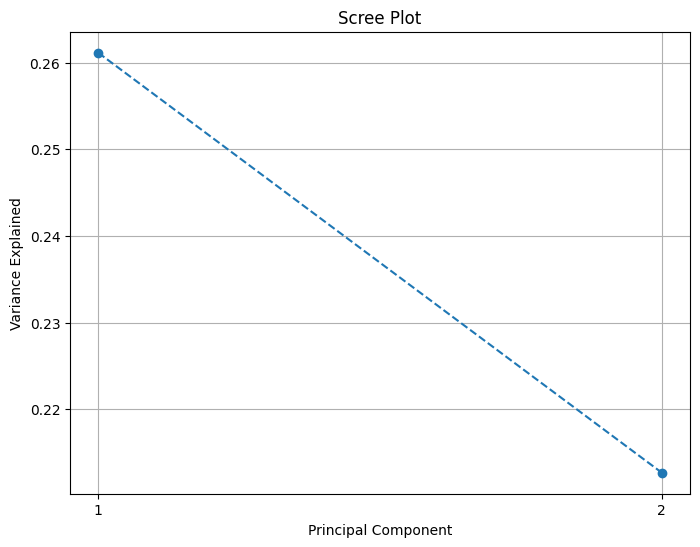

In [32]:
# Plot the scree plot (Explained variance ratio for each component)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()


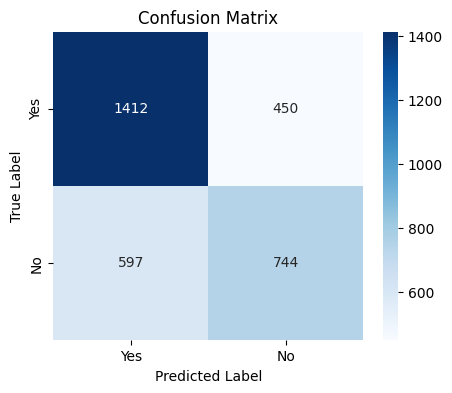

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

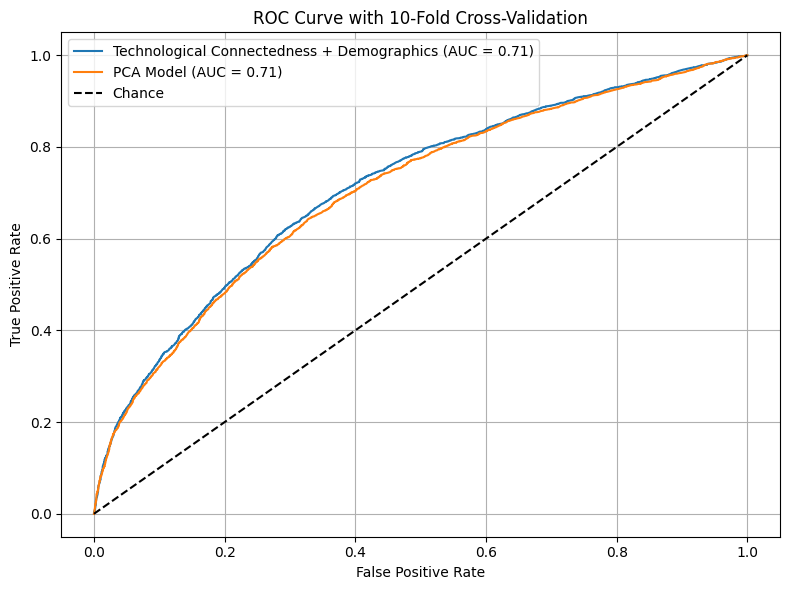

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features
scaler = StandardScaler()

# Define feature columns
feature_cols = ['social_media', 'physical_activity', 'cyberbully', 'age', 'sex']
X_dem = df_cleaned[feature_cols]
X_scaled = scaler.fit_transform(X_dem)

# Apply PCA and reduce dimensions to 3
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Define your target variable (make sure 'y' and 'y_dem' are defined)
y = df_cleaned.sad_hopeless
y_dem = df_cleaned.sad_hopeless  # Assuming this is your target for the demographic data model

# Set cross-validation to k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1231)

# Generate CV predicted probabilities for the demographic model
social_media_dem = cross_val_predict(
    LogisticRegression(max_iter=1000),  # same structure as top3_mod
    X_dem, y_dem, cv=cv, method='predict_proba'
)[:, 1]

# Generate CV predicted probabilities for the PCA model
social_media_pca = cross_val_predict(
    LogisticRegression(max_iter=1000),  # PCA-based model
    X_pca, y, cv=cv, method='predict_proba'
)[:, 1]

# ROC and area under curve for each model
fprdem, tprdem, _ = roc_curve(y_dem, social_media_dem)
fprpca, tprpca, _ = roc_curve(y, social_media_pca)

aucdem = auc(fprdem, tprdem)
auc_pca = auc(fprpca, tprpca)

# Plot ROC curves for all three models
plt.figure(figsize=(8, 6))
plt.plot(fprdem, tprdem, label=f'Technological Connectedness + Demographics (AUC = {aucdem:.2f})')
plt.plot(fprpca, tprpca, label=f'PCA Model (AUC = {auc_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 10-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC.png")
plt.show()

## Additional PCA 

In [75]:
df_pca = df.filter(items = ['Q84', 'Q26', 'Q27', 'Q28', 'Q29', 'Q80', 
                                'Q76', 'Q25', 'Q2','Q1', 'Q86', 'RACEETH', 
                                'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 
                                'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q20', 
                                'Q21', 'Q22', 'Q23', 'Q41', 'Q42', 'Q43', 'Q44', 
                                'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 
                                'Q54', 'Q55', 'Q57', 'Q64', 'Q65', 'Q66', 'Q87', 'Q89', 
                                'Q90', 'Q91', 'Q92', 'Q99', 'Q103', 'Q105', 'Q18', 'Q19', 
                                'Q24', 'Q31', 'Q36', 'Q56', 'Q88', 'Q100', 
                                'Q101', 'Q102', 'Q106'])

df_pca = df_pca.dropna()

# minus one on 76
df_pca['Q76'] = df_pca['Q76'].apply(reduce_by_one)

# to category
categories = ['Q1', 'Q2', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q20', 
              'Q21', 'Q22', 'Q23', 'Q41', 'Q42', 'Q43', 'Q44','Q46', 'Q47', 'Q48', 'Q49',
              'Q50', 'Q51', 'Q52', 'Q53','Q54', 'Q55', 'Q57', 'Q64', 'Q65', 'Q66', 'Q87', 'Q89', 
              'Q90', 'Q91', 'Q92', 'Q99', 'Q103', 'Q105', 'RACEETH']

for column in categories:
    df_pca[column] = df_pca[column].astype('category')

binary = ['Q18', 'Q19','Q24', 'Q25', 'Q26', 'Q31', 'Q36', 'Q56', 'Q88', 'Q100','Q101', 'Q102', 'Q106']

for column in binary:
    df_pca[column] = df_pca[column].apply(to_0_1)
    
# target_value = ['1.68 74.8453231111112212212212211151112211','1.85 56.7051111111312212112212111151111131']
# for x in target_value:
#     # Find the row that contains this value
#     row_to_drop = df_pca[df_pca.apply(lambda row: row.astype(str).str.contains(x).any(), axis=1)]

#     # Drop the row from the DataFrame
#     df_pca = df_pca.drop(row_to_drop.index)

In [73]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7766 entries, 1 to 11426
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Q84      7766 non-null   float64 
 1   Q26      7766 non-null   int64   
 2   Q27      7766 non-null   float64 
 3   Q28      7766 non-null   float64 
 4   Q29      7766 non-null   float64 
 5   Q80      7766 non-null   float64 
 6   Q76      7766 non-null   float64 
 7   Q25      7766 non-null   int64   
 8   Q2       7766 non-null   category
 9   Q1       7766 non-null   category
 10  Q86      7766 non-null   float64 
 11  RACEETH  7766 non-null   category
 12  Q6       7766 non-null   object  
 13  Q7       7766 non-null   object  
 14  Q8       7766 non-null   category
 15  Q9       7766 non-null   category
 16  Q10      7766 non-null   category
 17  Q11      7766 non-null   category
 18  Q12      7766 non-null   category
 19  Q13      7766 non-null   category
 20  Q14      7766 non-null   category


In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

scaler = StandardScaler()

feature_cols = ['Q26', 'Q80', 'Q76', 'Q25', 'Q2','Q1', 'Q86', 'RACEETH', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 
                                'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q20', 
                                'Q21', 'Q22', 'Q23', 'Q41', 'Q42', 'Q43', 'Q44', 
                                'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 
                                'Q54', 'Q55', 'Q57', 'Q64', 'Q65', 'Q66', 'Q87', 'Q89', 
                                'Q90', 'Q91', 'Q92', 'Q99', 'Q103', 'Q105', 'Q18', 'Q19', 
                                'Q24', 'Q31', 'Q36', 'Q56', 'Q88', 'Q100', 
                                'Q101', 'Q102', 'Q106']
X_dem = df_pca[feature_cols]
X_scaled = scaler.fit_transform(X_dem)
y = df_pca.Q26


In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_pca[feature_cols]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]


In [93]:
vif_data.sort_values(by = 'VIF', axis = 0, ascending = False).head(10)

,feature,VIF
35,Q55,121.204068
32,Q52,69.227318
33,Q53,48.061971
19,Q21,31.168036
34,Q54,31.055348
8,Q8,25.291508
5,Q1,24.626041
47,Q105,23.287754
30,Q50,22.796679
36,Q57,20.295221


In [86]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

pca_summary = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_variance))],
    'Explained Variance': explained_variance,
    'Cumulative Explained Variance': cumulative_explained_variance
})
pca_summary

,Principal Component,Explained Variance,Cumulative Explained Variance
0,PC1,0.159073,0.159073
1,PC2,0.070994,0.230067
2,PC3,0.061667,0.291733
3,PC4,0.033882,0.325616


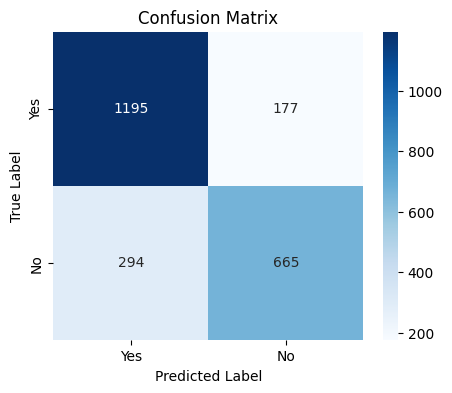

In [81]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

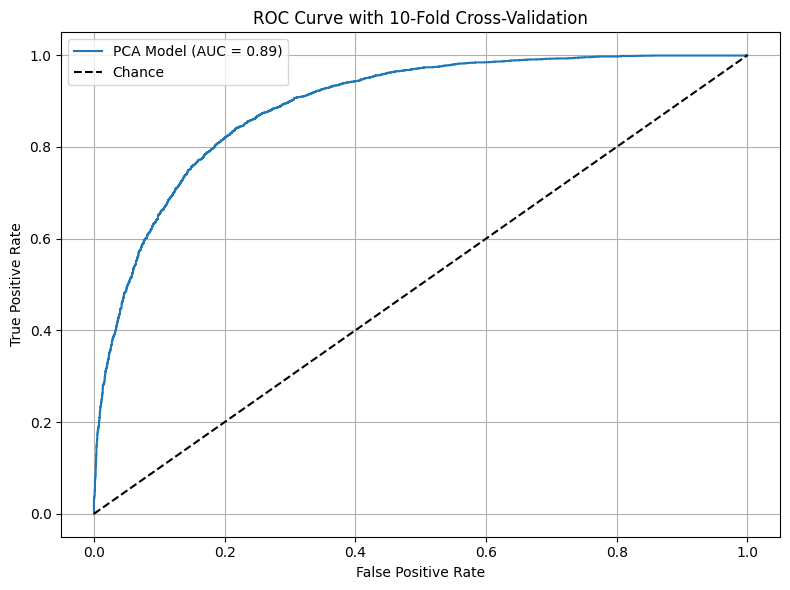

In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the features
scaler = StandardScaler()

# Define feature columns
feature_cols = ['Q26', 'Q80', 'Q76', 'Q25', 'Q2','Q1', 'Q86', 'RACEETH', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 
                                'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q20', 
                                'Q21', 'Q22', 'Q23', 'Q41', 'Q42', 'Q43', 'Q44', 
                                'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 
                                'Q54', 'Q55', 'Q57', 'Q64', 'Q65', 'Q66', 'Q87', 'Q89', 
                                'Q90', 'Q91', 'Q92', 'Q99', 'Q103', 'Q105', 'Q18', 'Q19', 
                                'Q24', 'Q31', 'Q36', 'Q56', 'Q88', 'Q100', 
                                'Q101', 'Q102', 'Q106']
X_dem = df_pca[feature_cols]
X_scaled = scaler.fit_transform(X_dem)

# Apply PCA and reduce dimensions to 3
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Define your target variable (make sure 'y' and 'y_dem' are defined)
y = df_pca.Q26
y_dem = df_pca.Q26  # Assuming this is your target for the demographic data model

# Set cross-validation to k=10
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1231)

# Generate CV predicted probabilities for the PCA model
social_media_pca = cross_val_predict(
    LogisticRegression(max_iter=1000),  # PCA-based model
    X_pca, y, cv=cv, method='predict_proba'
)[:, 1]

# ROC and area under curve for each model
fprpca, tprpca, _ = roc_curve(y, social_media_pca)

auc_pca = auc(fprpca, tprpca)

# Plot ROC curves for all three models
plt.figure(figsize=(8, 6))
plt.plot(fprpca, tprpca, label=f'PCA Model (AUC = {auc_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with 10-Fold Cross-Validation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ROC.png")
plt.show()

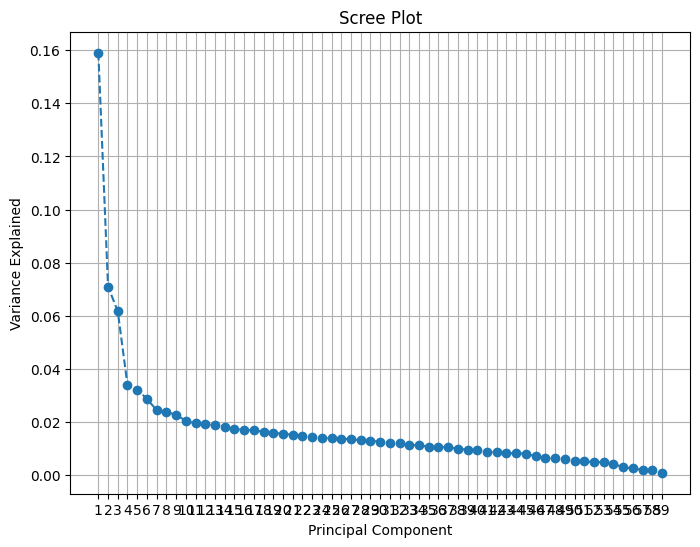

In [79]:

# Plot the scree plot (Explained variance ratio for each component)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()